# Clean & Analyze Social Media

## Introduction

Social media has become a ubiquitous part of modern life, with platforms such as Instagram, Twitter, and Facebook serving as essential communication channels. Social media data sets are vast and complex, making analysis a challenging task for businesses and researchers alike. In this project, we explore a simulated social media, for example Tweets, data set to understand trends in likes across different categories.

## Prerequisites

To follow along with this project, you should have a basic understanding of Python programming and data analysis concepts. In addition, you may want to use the following packages in your Python environment:

- pandas
- Matplotlib
- ...

These packages should already be installed in Coursera's Jupyter Notebook environment, however if you'd like to install additional packages that are not included in this environment or are working off platform you can install additional packages using `!pip install packagename` within a notebook cell such as:

- `!pip install pandas`
- `!pip install matplotlib`

## Project Scope

The objective of this project is to analyze tweets (or other social media data) and gain insights into user engagement. We will explore the data set using visualization techniques to understand the distribution of likes across different categories. Finally, we will analyze the data to draw conclusions about the most popular categories and the overall engagement on the platform.

## Step 1: Importing Required Libraries

As the name suggests, the first step is to import all the necessary libraries that will be used in the project. In this case, we need pandas, numpy, matplotlib, seaborn, and random libraries.

Pandas is a library used for data manipulation and analysis. Numpy is a library used for numerical computations. Matplotlib is a library used for data visualization. Seaborn is a library used for statistical data visualization. Random is a library used to generate random numbers.

In [8]:
# your code here
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns


# Exploratory Analysis

Exploratory Data Analysis giving insights from Facebook dataset
Dataset available in https://www.kaggle.com/datasets/sheenabatra/facebook-data/code


In [9]:
# receiving the dataset for analysis
data_facebook = pd.read_csv("pseudo_facebook.csv", sep=",")

In [10]:
# dataset header view
data_facebook.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


In [11]:
#dataset tail visualization
data_facebook.tail()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
98998,1268299,68,4,1945,4,female,541.0,2118,341,3996,18089,3505,11887,491,6202
98999,1256153,18,12,1995,3,female,21.0,1968,1720,4401,13412,4399,10592,2,2820
99000,1195943,15,10,1998,5,female,111.0,2002,1524,11959,12554,11959,11462,0,1092
99001,1468023,23,11,1990,4,female,416.0,2560,185,4506,6516,4506,5760,0,756
99002,1397896,39,15,1974,5,female,397.0,2049,768,9410,12443,9410,9530,0,2913


In [12]:
#shape of the dataset
data_facebook.shape

(99003, 15)

In [13]:
#check missing data
data_facebook.isna().sum()

userid                     0
age                        0
dob_day                    0
dob_year                   0
dob_month                  0
gender                   175
tenure                     2
friend_count               0
friendships_initiated      0
likes                      0
likes_received             0
mobile_likes               0
mobile_likes_received      0
www_likes                  0
www_likes_received         0
dtype: int64

In [14]:
# deleting rows with missing data from the dataset
data = data_facebook.dropna()
data.head()


,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


In [15]:
# checking duplicate data
data.duplicated().sum()

0

In [16]:
# Descriptive statistics of the dataset
data.describe()

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,9.882600e+04,98826.000000,98826.000000,98826.000000,98826.000000,98826.000000,98826.000000,98826.000000,98826.000000,98826.000000,98826.000000,98826.000000,98826.000000,98826.000000
mean,1.597069e+06,37.212646,14.533109,1975.787354,6.284753,535.649758,196.374031,107.480056,156.111762,142.665432,106.147846,84.118835,49.963866,58.546557
std,3.440114e+05,22.524220,9.013865,22.524220,3.529431,454.258423,387.463475,188.861581,572.553504,1388.990063,445.494703,840.543366,285.751489,601.880496
min,1.000008e+06,13.000000,1.000000,1900.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.298868e+06,20.000000,7.000000,1963.000000,3.000000,226.000000,31.000000,17.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.596225e+06,28.000000,14.000000,1985.000000,6.000000,412.000000,82.000000,46.000000,11.000000,8.000000,4.000000,4.000000,0.000000,2.000000
75%,1.895572e+06,50.000000,22.000000,1993.000000,9.000000,673.000000,206.000000,117.000000,81.000000,59.000000,46.000000,33.000000,7.000000,20.000000
max,2.193542e+06,113.000000,31.000000,2000.000000,12.000000,3139.000000,4923.000000,4144.000000,25111.000000,261197.000000,25111.000000,138561.000000,14865.000000,129953.000000


# Correlational Analysis

In [17]:
data_values = data.drop(columns=['userid'])

In [18]:
data_values.head()

,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


In [19]:
correlation = data_values.corr()

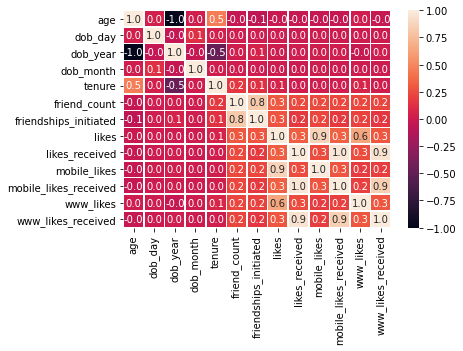

In [72]:
# plot da matrix de correlação

correlation_plot = sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
correlation_plot

- Conclusion

In the examination of feature correlations within the dataset, it is notable that no substantial correlations were identified among the features. This suggests a lack of strong linear relationships between the variables under consideration.

The absence of significant correlations implies that the features within the dataset are relatively independent of each other. This finding holds implications for various analytical and modeling endeavors. While the lack of strong correlations simplifies the interpretation of individual features, it also prompts a careful consideration of the unique contributions each feature makes to the overall dataset dynamics.

In the context of decision-making, modeling, or feature selection, the independence of features may guide practitioners to focus on the individual impact of each variable rather than relying on strong inter-variable relationships. Understanding the nature of these feature interactions is crucial for refining analytical approaches and ensuring the accuracy and reliability of any conclusions drawn from the dataset.

# Graphical analysis

# Gender analysis

In [21]:
gender = data_values["gender"].value_counts()
gender

male      58574
female    40252
Name: gender, dtype: int64

([<matplotlib.patches.Wedge at 0x7faa23ee6450>,
 [Text(-0.17227276989838777, 0.5747365420360333, 'male'),
  Text(0.17227276989838794, -0.5747365420360333, 'female')],
 [Text(-0.3589016039549745, 1.1973677959084028, '59.3%'),
  Text(0.35890160395497483, -1.1973677959084026, '40.7%')])

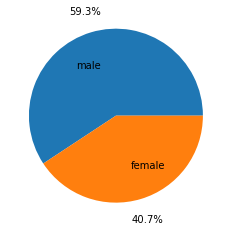

In [22]:
fig, ax = plt.subplots()
ax.pie(gender, labels=("male","female"),
      autopct='%1.1f%%',
      pctdistance=1.25, labeldistance=.6)

- Conclusion

Upon careful examination of the data, it becomes evident that there is a slight predominance of male users on the social media platform in question. The proportion of data suggests that the male gender has a marginal lead in terms of usage.

In the context of digital marketing campaigns on platforms like Facebook and Instagram, this gender-based insight is valuable for tailoring strategies to the predominant user demographic. Marketers may find it beneficial to craft content and advertisements that resonate specifically with the interests and preferences of male users, aiming to maximize the impact of their campaigns.

Recognizing the subtle gender imbalances in platform usage allows marketers to refine their targeting and messaging strategies, ensuring that campaigns are finely tuned to the characteristics of the user base. By acknowledging and leveraging this data, marketers can optimize their campaigns to reach and engage with the slightly more prevalent male audience effectively.

As the dynamics of social media usage continue to evolve, staying attuned to these gender-based trends remains a key element in crafting successful and targeted digital marketing initiatives.

# Age analysis

In [23]:
age_min = data_values["age"].min()
age_min

13

In [24]:
age_max = data_values["age"].max()
age_max

113

In [25]:
n = len(data_values["age"])
n

98826

# Sturges Rule
Sturges Rule is a criterion used to determine the number of classes or intervals needed to graphically represent a set of statistical data. This rule was formulated in 1926 by the German mathematician Herbert Sturges.
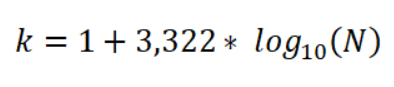

In [26]:
# applying Sturges' criterion to define the number of classes

k = round(1 + 3.322*math.log(n),0)
k

39.0

In [27]:
# determining class width
AC = round((age_max - age_min)/k,0)
AC

3.0

In [45]:
# define grupo to age
intervalos = list(range(data_values['age'].min() // 3 * 3, (data_values['age'].max() // 3 + 1) * 3, 3))


In [46]:
frequencia_por_intervalo = pd.cut(data_values['age'], bins=intervalos, include_lowest=True, right=False).value_counts(sort=False)

In [47]:
age_grouped = pd.DataFrame({'Intervalo': [f'{intervalo.left}-{intervalo.right-1}' for intervalo in frequencia_por_intervalo.index], 
                        'Frequencia': frequencia_por_intervalo.values})

In [48]:
age_grouped.head()

,Intervalo,Frequencia
0,12-14,2409
1,15-17,8984
2,18-20,13354
3,21-23,11104
4,24-26,9277


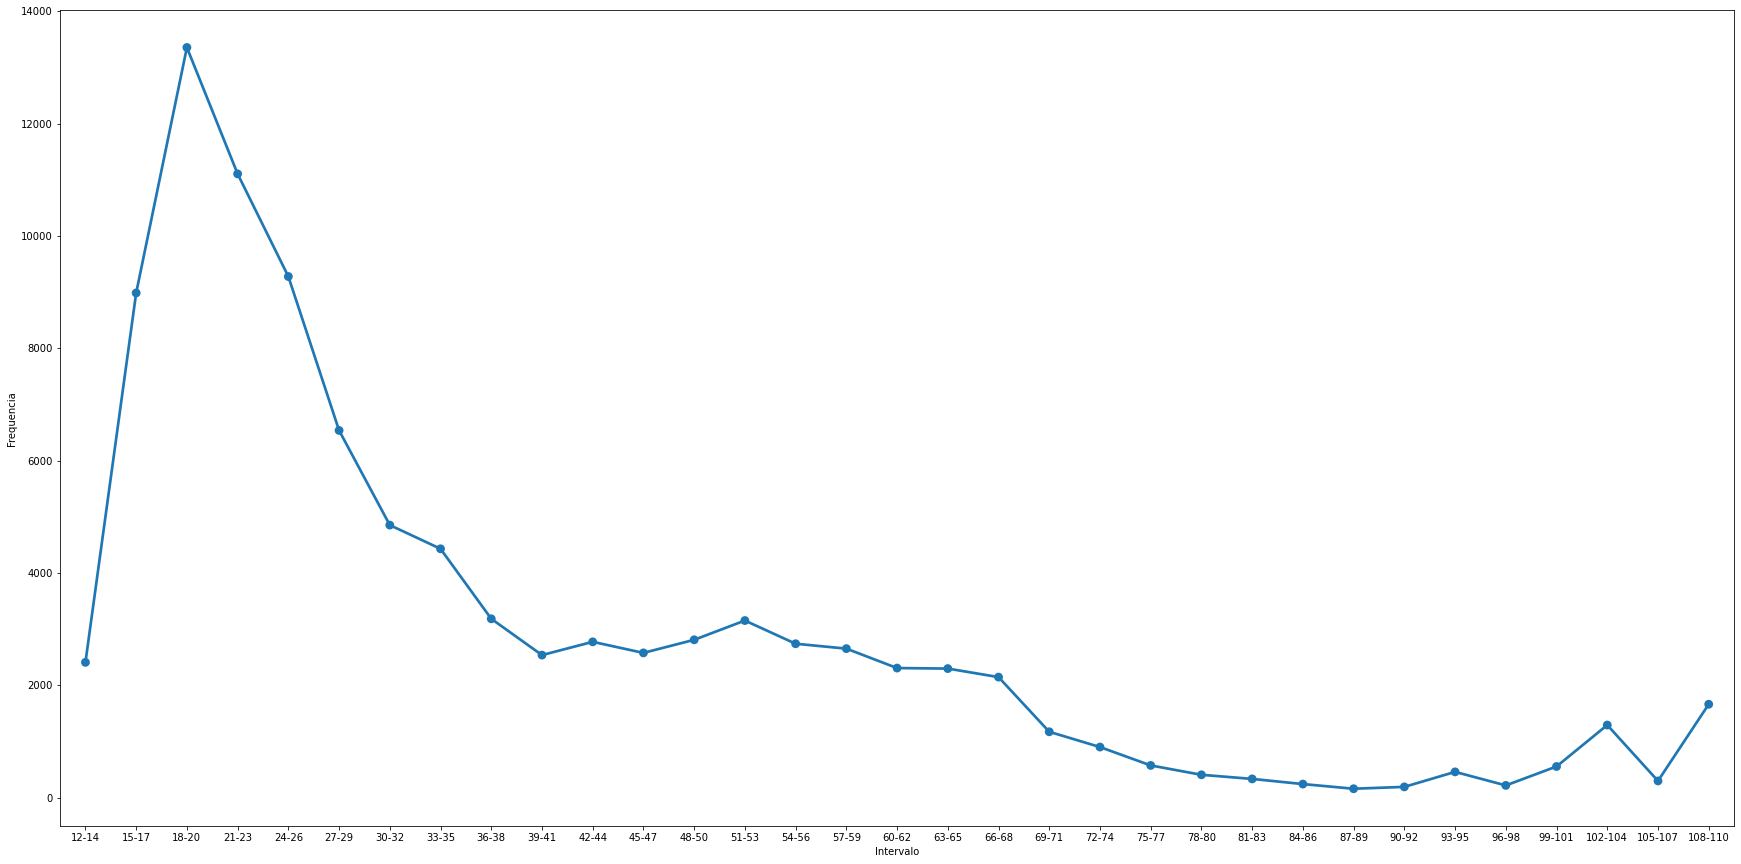

In [53]:
# visualize age
plt.figure(figsize=(30, 15))
sns.pointplot(x='Intervalo', y='Frequencia', data = age_grouped)

- Conclusion

The analysis of the age distribution frequency reveals intriguing patterns in the user demographic of the social media platform under consideration. There is a distinct upward trend in user numbers among the age group of 12 to 20 years, with a substantial peak in the 18 to 20-year range. However, a noticeable decline is observed as users enter the age range of 21 to 41 years. Beyond this point, there is a continuous but gentle descent in user numbers.

This nuanced understanding of the age distribution can significantly inform digital marketing strategies. The platform appears to attract a substantial audience in the late teenage years, particularly peaking at 18 to 20 years. As users enter their twenties and thirties, there is a decline, suggesting a shift in user engagement or preferences.

Marketers can leverage this information to tailor content and campaigns to the preferences and characteristics of the predominant age groups. Acknowledging the unique patterns within each age range allows for more targeted and effective engagement strategies. As the user base ages, a careful and adaptive approach to digital marketing can maximize its impact on the diverse demographic landscape observed in the age distribution frequency.

# Likes x Gender analysis

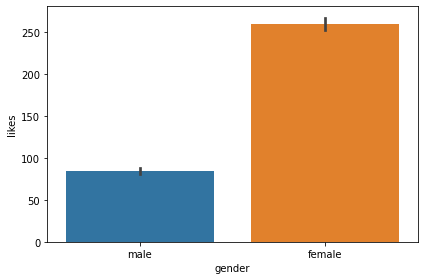

In [60]:
#criando uma figure, axes
fig, ax = plt.subplots()
#criando o gráfico de barras 
sns.barplot(x=data_values.gender, y=data_values['likes'], ax=ax, data=data_values)
#otimizar espaço da figure
fig.tight_layout();

# Likes_received x Gender analysis

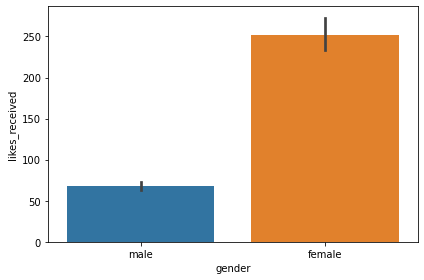

In [62]:
#criando uma figure, axes
fig, ax = plt.subplots()
#criando o gráfico de barras 
sns.barplot(x=data_values.gender, y=data_values['likes_received'], ax=ax, data=data_values)
#otimizar espaço da figure
fig.tight_layout();


- Conclusion

Upon analyzing the data, a noteworthy observation emerges in the form of a substantial disproportion in the number of likes received between male and female genders. The evidence indicates that the female gender holds a significantly more impactful position in terms of this metric.

In the realm of digital marketing campaigns on platforms such as Facebook and Instagram, this finding carries substantial implications. The pronounced preference for likes from the female audience suggests a higher level of engagement or resonance with content tailored to this demographic. Marketers can strategically utilize this information to optimize their campaigns, tailoring content and strategies to cater specifically to the preferences of the female audience.

Understanding and adapting to the observed disparities in likes received based on gender can enhance the effectiveness of digital marketing efforts. A campaign that acknowledges and aligns with the apparent preferences of the female audience may not only generate more likes but also foster increased brand loyalty and engagement.

As the landscape of digital platforms evolves, acknowledging and incorporating such gender-based nuances can significantly enhance the impact and success of marketing initiatives.

# Friends x Gender analysis

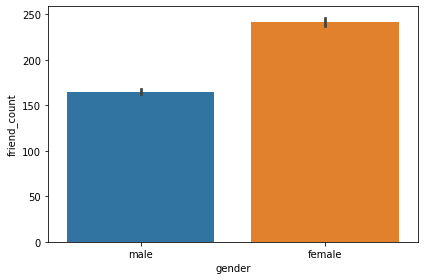

In [61]:
#criando uma figure, axes
fig, ax = plt.subplots()
#criando o gráfico de barras 
sns.barplot(x=data_values.gender, y=data_values['friend_count'], ax=ax, data=data_values)
#otimizar espaço da figure
fig.tight_layout();

- Conclusion

Upon examination of the data, it is evident that the number of friends per gender exhibits a subtle inclination toward the female gender. This observation suggests a potential trend in social connections, with females appearing to engage in a slightly higher number of friendships compared to their male counterparts.

In the context of digital marketing campaigns on platforms like Facebook, Instagram, and others, understanding such gender-based social dynamics is crucial. The data implies that campaigns targeting a predominantly female audience may have a broader reach and potentially higher engagement. Marketers could leverage this insight to tailor their content, advertisements, and strategies to resonate more effectively with the observed social tendencies.

It's essential for marketing campaigns to adapt and align with the prevailing social behaviors on these platforms. Recognizing and embracing the subtle variations in friend acquisition patterns based on gender can lead to more targeted and impactful digital marketing efforts. As social dynamics continue to evolve in the digital landscape, staying attuned to these trends becomes a valuable asset for creating successful and resonant marketing campaigns.

# Friendships Initiated x Gender analysis

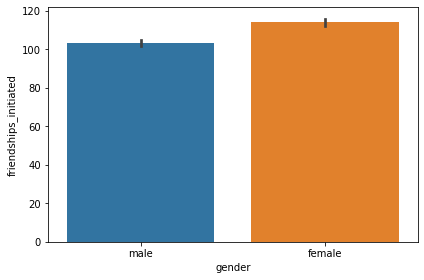

In [73]:
#criando uma figure, axes
fig, ax = plt.subplots()
#criando o gráfico de barras 
sns.barplot(x=data_values.gender, y=data_values['friendships_initiated'], ax=ax, data=data_values)
#otimizar espaço da figure
fig.tight_layout();

- Conclusion

Upon careful analysis of the graph, it becomes evident that there is no discernible distinction between Friendships Initiated based on gender. The data does not reveal any significant disparities in the initiation of friendships between different genders. This suggests a level of gender neutrality or equality in the context of friendship initiation as depicted in the chart.

It is worth noting that the absence of a noticeable trend may indicate a balanced and inclusive social environment where individuals are equally open to initiating friendships regardless of gender. However, further investigation and consideration of additional factors may be necessary to provide a more comprehensive understanding of the dynamics at play.

In conclusion, while the current findings suggest a lack of gender-based differences in friendship initiation, future research could delve deeper into the nuances of social interactions to unveil any subtleties that may influence these patterns.

## Final Considerations

In conclusion, this study aimed to [descrição do objetivo do estudo]. Throughout the research, we have explored [principais tópicos ou descobertas]. It is evident from our findings that [principal conclusão]. Additionally, [observações adicionais, se aplicável].

It is crucial to highlight [aspectos importantes] as they have significant implications for [relevância do estudo]. Despite the achievements, there are still areas that warrant further investigation, such as [possíveis direções futuras de pesquisa].

In summary, this research contributes to the understanding of [tema do estudo] and provides valuable insights into [relevância mais ampla]. We hope that this work stimulates further discussion and research in the field.

Thank you for your attention.